In [1]:

import quimb as qu
import quimb.tensor as qtn

In [2]:
# contengra is a library for optimizing tensor network contractions
# tensor network contractions are done by repeatedly contracting pairs of tensors
import cotengra as ctg
# ReusableHyperOptimizer is a subclass of HyperOptimizer which is used to optimize a single
#  path repeatedly. This is useful for optimizing paths which are reused many times, such as in a DMRG sweep.
# the arguments are as follows: methods, reconf_opts, max_repeats, max_time, parallel, directory
# methods: list of methods to use for optimization
# reconf_opts: dictionary of options to pass to the reconfigurer
# max_repeats: maximum number of times to repeat the optimization
# max_time: maximum time to spend optimizing
# parallel: whether to use parallel optimization
# directory: whether to use a directory to cache paths
opt = ctg.ReusableHyperOptimizer(
    methods=['greedy'],
    reconf_opts={}, 
    max_repeats=32,
    max_time="rate:1e6",
    parallel=True,
    # use the following for persistently cached paths
    # directory=True,
)

/home/iisers/.local/lib/python3.8/site-packages/cotengra/hyper.py:29: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn("Couldn't import `kahypar` - skipping from default "


In [3]:
Offset =  247842.5 # the constant term of the hamiltonian
Ising_Hamiltonian = {
'IIIIIIIIIIIIIIIIIIIIIIIIZ' : - 21221.5, 
'IIIIIIIIIIIIIIIIIIIIIIIZI' : - 21221.5, 
'IIIIIIIIIIIIIIIIIIIIIIZII' : - 21221.5, 
'IIIIIIIIIIIIIIIIIIIIIZIII' : - 21221.5,
'IIIIIIIIIIIIIIIIIIIIZIIII' : - 21221.5, 
'IIIIIIIIIIIIIIIIIIIZIIIII' : - 21230.5, 
'IIIIIIIIIIIIIIIIIIZIIIIII' : - 21230.5, 
'IIIIIIIIIIIIIIIIIZIIIIIII' : - 21230.5, 
'IIIIIIIIIIIIIIIIZIIIIIIII' : - 21230.5, 
'IIIIIIIIIIIIIIIZIIIIIIIII' : - 21230.5, 
'IIIIIIIIIIIIIIZIIIIIIIIII' : - 21248.5, 
'IIIIIIIIIIIIIZIIIIIIIIIII' : - 21248.5, 
'IIIIIIIIIIIIZIIIIIIIIIIII' : - 21248.5, 
'IIIIIIIIIIIZIIIIIIIIIIIII' : - 21248.5, 
'IIIIIIIIIIZIIIIIIIIIIIIII' : - 21248.5, 
'IIIIIIIIIZIIIIIIIIIIIIIII' : - 21222.0, 
'IIIIIIIIZIIIIIIIIIIIIIIII' : - 21222.0, 
'IIIIIIIZIIIIIIIIIIIIIIIII' : - 21222.0, 
'IIIIIIZIIIIIIIIIIIIIIIIII' : - 21222.0, 
'IIIIIZIIIIIIIIIIIIIIIIIII' : - 21222.0, 
'IIIIZIIIIIIIIIIIIIIIIIIII' : - 21245.5, 
'IIIZIIIIIIIIIIIIIIIIIIIII' : - 21245.5, 
'IIZIIIIIIIIIIIIIIIIIIIIII' : - 21245.5, 
'IZIIIIIIIIIIIIIIIIIIIIIII' : - 21245.5, 
'ZIIIIIIIIIIIIIIIIIIIIIIII' : - 21245.5, 
'IIIIIIIIIIIIIIIIIIIIIIIZZ' : + 3515.5,  
'IIIIIIIIIIIIIIIIIIIIIIZIZ' : + 3515.5,  
'IIIIIIIIIIIIIIIIIIIIIIZZI' : + 3515.5,  
'IIIIIIIIIIIIIIIIIIIIIZIIZ' : + 3515.5,  
'IIIIIIIIIIIIIIIIIIIIIZIZI' : + 3515.5,  
'IIIIIIIIIIIIIIIIIIIIIZZII' : + 3515.5,  
'IIIIIIIIIIIIIIIIIIIIZIIIZ' : + 3515.5,  
'IIIIIIIIIIIIIIIIIIIIZIIZI' : + 3515.5,  
'IIIIIIIIIIIIIIIIIIIIZIZII' : + 3515.5,  
'IIIIIIIIIIIIIIIIIIIIZZIII' : + 3515.5,  
'IIIIIIIIIIIIIIIIIIIZIIIIZ' : + 3515.5,  
'IIIIIIIIIIIIIIIIIIIZIIIZI' : + 12.0  ,  
'IIIIIIIIIIIIIIIIIIIZZIIII' : + 12.0  ,  
'IIIIIIIIIIIIIIIIIIZIIIIIZ' : + 12.0  ,  
'IIIIIIIIIIIIIIIIIIZIIIIZI' : + 3515.5,  
'IIIIIIIIIIIIIIIIIIZIIIZII' : + 12.0  ,  
'IIIIIIIIIIIIIIIIIIZZIIIII' : + 3515.5,  
'IIIIIIIIIIIIIIIIIZIIIIIZI' : + 12.0  ,  
'IIIIIIIIIIIIIIIIIZIIIIZII' : + 3515.5,  
'IIIIIIIIIIIIIIIIIZIIIZIII' : + 12.0  ,  
'IIIIIIIIIIIIIIIIIZIZIIIII' : + 3515.5,  
'IIIIIIIIIIIIIIIIIZZIIIIII' : + 3515.5,  
'IIIIIIIIIIIIIIIIZIIIIIZII' : + 12.0  ,  
'IIIIIIIIIIIIIIIIZIIIIZIII' : + 3515.5,  
'IIIIIIIIIIIIIIIIZIIIZIIII' : + 12.0  ,  
'IIIIIIIIIIIIIIIIZIIZIIIII' : + 3515.5,  
'IIIIIIIIIIIIIIIIZIZIIIIII' : + 3515.5,  
'IIIIIIIIIIIIIIIIZZIIIIIII' : + 3515.5,  
'IIIIIIIIIIIIIIIZIIIIIIIIZ' : + 12.0  ,  
'IIIIIIIIIIIIIIIZIIIIIZIII' : + 12.0  ,  
'IIIIIIIIIIIIIIIZIIIIZIIII' : + 3515.5,  
'IIIIIIIIIIIIIIIZIIIZIIIII' : + 3515.5,  
'IIIIIIIIIIIIIIIZIIZIIIIII' : + 3515.5,  
'IIIIIIIIIIIIIIIZIZIIIIIII' : + 3515.5,  
'IIIIIIIIIIIIIIIZZIIIIIIII' : + 3515.5,  
'IIIIIIIIIIIIIIZIIIIIIIIIZ' : + 3515.5,  
'IIIIIIIIIIIIIIZIIIIIIIIZI' : + 22.75 ,  
'IIIIIIIIIIIIIIZIIIIIZIIII' : + 22.75 ,  
'IIIIIIIIIIIIIIZIIIIZIIIII' : + 3515.5,  
'IIIIIIIIIIIIIIZIIIZIIIIII' : + 15.75 ,  
'IIIIIIIIIIIIIIZZIIIIIIIII' : + 15.75 ,  
'IIIIIIIIIIIIIZIIIIIIIIIIZ' : + 22.75 ,  
'IIIIIIIIIIIIIZIIIIIIIIIZI' : + 3515.5,  
'IIIIIIIIIIIIIZIIIIIIIIZII' : + 22.75 ,  
'IIIIIIIIIIIIIZIIIIIZIIIII' : + 15.75 ,  
'IIIIIIIIIIIIIZIIIIZIIIIII' : + 3515.5,  
'IIIIIIIIIIIIIZIIIZIIIIIII' : + 15.75 ,  
'IIIIIIIIIIIIIZZIIIIIIIIII' : + 3515.5,  
'IIIIIIIIIIIIZIIIIIIIIIIZI' : + 22.75 ,  
'IIIIIIIIIIIIZIIIIIIIIIZII' : + 3515.5,  
'IIIIIIIIIIIIZIIIIIIIIZIII' : + 22.75 ,  
'IIIIIIIIIIIIZIIIIIZIIIIII' : + 15.75 ,  
'IIIIIIIIIIIIZIIIIZIIIIIII' : + 3515.5,  
'IIIIIIIIIIIIZIIIZIIIIIIII' : + 15.75 ,  
'IIIIIIIIIIIIZIZIIIIIIIIII' : + 3515.5,  
'IIIIIIIIIIIIZZIIIIIIIIIII' : + 3515.5,  
'IIIIIIIIIIIZIIIIIIIIIIZII' : + 22.75 ,  
'IIIIIIIIIIIZIIIIIIIIIZIII' : + 3515.5,  
'IIIIIIIIIIIZIIIIIIIIZIIII' : + 22.75 ,  
'IIIIIIIIIIIZIIIIIZIIIIIII' : + 15.75 ,  
'IIIIIIIIIIIZIIIIZIIIIIIII' : + 3515.5,  
'IIIIIIIIIIIZIIIZIIIIIIIII' : + 15.75 ,  
'IIIIIIIIIIIZIIZIIIIIIIIII' : + 3515.5,  
'IIIIIIIIIIIZIZIIIIIIIIIII' : + 3515.5,  
'IIIIIIIIIIIZZIIIIIIIIIIII' : + 3515.5,  
'IIIIIIIIIIZIIIIIIIIIIIIIZ' : + 22.75 ,  
'IIIIIIIIIIZIIIIIIIIIIZIII' : + 22.75 ,  
'IIIIIIIIIIZIIIIIIIIIZIIII' : + 3515.5,  
'IIIIIIIIIIZIIIIIIIIZIIIII' : + 15.75 ,  
'IIIIIIIIIIZIIIIIZIIIIIIII' : + 15.75 ,  
'IIIIIIIIIIZIIIIZIIIIIIIII' : + 3515.5,  
'IIIIIIIIIIZIIIZIIIIIIIIII' : + 3515.5,  
'IIIIIIIIIIZIIZIIIIIIIIIII' : + 3515.5,  
'IIIIIIIIIIZIZIIIIIIIIIIII' : + 3515.5,  
'IIIIIIIIIIZZIIIIIIIIIIIII' : + 3515.5,  
'IIIIIIIIIZIIIIIIIIIIIIIIZ' : + 3515.5,  
'IIIIIIIIIZIIIIIIIIIIIIIZI' : + 8.25  ,  
'IIIIIIIIIZIIIIIIIIIIZIIII' : + 8.25  ,  
'IIIIIIIIIZIIIIIIIIIZIIIII' : + 3515.5,  
'IIIIIIIIIZIIIIIIIIZIIIIII' : + 17.75 ,  
'IIIIIIIIIZIIIIIZIIIIIIIII' : + 17.75 ,  
'IIIIIIIIIZIIIIZIIIIIIIIII' : + 3515.5,  
'IIIIIIIIIZIIIZIIIIIIIIIII' : + 23.0  ,  
'IIIIIIIIIZZIIIIIIIIIIIIII' : + 23.0  ,  
'IIIIIIIIZIIIIIIIIIIIIIIIZ' : + 8.25  ,  
'IIIIIIIIZIIIIIIIIIIIIIIZI' : + 3515.5,  
'IIIIIIIIZIIIIIIIIIIIIIZII' : + 8.25  ,  
'IIIIIIIIZIIIIIIIIIIZIIIII' : + 17.75 ,  
'IIIIIIIIZIIIIIIIIIZIIIIII' : + 3515.5,  
'IIIIIIIIZIIIIIIIIZIIIIIII' : + 17.75 ,  
'IIIIIIIIZIIIIIZIIIIIIIIII' : + 23.0  ,  
'IIIIIIIIZIIIIZIIIIIIIIIII' : + 3515.5,  
'IIIIIIIIZIIIZIIIIIIIIIIII' : + 23.0  ,  
'IIIIIIIIZZIIIIIIIIIIIIIII' : + 3515.5,  
'IIIIIIIZIIIIIIIIIIIIIIIZI' : + 8.25  ,  
'IIIIIIIZIIIIIIIIIIIIIIZII' : + 3515.5,  
'IIIIIIIZIIIIIIIIIIIIIZIII' : + 8.25  ,  
'IIIIIIIZIIIIIIIIIIZIIIIII' : + 17.75 ,  
'IIIIIIIZIIIIIIIIIZIIIIIII' : + 3515.5,  
'IIIIIIIZIIIIIIIIZIIIIIIII' : + 17.75 ,  
'IIIIIIIZIIIIIZIIIIIIIIIII' : + 23.0  ,  
'IIIIIIIZIIIIZIIIIIIIIIIII' : + 3515.5,  
'IIIIIIIZIIIZIIIIIIIIIIIII' : + 23.0  ,  
'IIIIIIIZIZIIIIIIIIIIIIIII' : + 3515.5,  
'IIIIIIIZZIIIIIIIIIIIIIIII' : + 3515.5,  
'IIIIIIZIIIIIIIIIIIIIIIZII' : + 8.25  ,  
'IIIIIIZIIIIIIIIIIIIIIZIII' : + 3515.5,  
'IIIIIIZIIIIIIIIIIIIIZIIII' : + 8.25  ,  
'IIIIIIZIIIIIIIIIIZIIIIIII' : + 17.75 ,  
'IIIIIIZIIIIIIIIIZIIIIIIII' : + 3515.5,  
'IIIIIIZIIIIIIIIZIIIIIIIII' : + 17.75 ,  
'IIIIIIZIIIIIZIIIIIIIIIIII' : + 23.0  ,  
'IIIIIIZIIIIZIIIIIIIIIIIII' : + 3515.5,  
'IIIIIIZIIIZIIIIIIIIIIIIII' : + 23.0  ,  
'IIIIIIZIIZIIIIIIIIIIIIIII' : + 3515.5,  
'IIIIIIZIZIIIIIIIIIIIIIIII' : + 3515.5,  
'IIIIIIZZIIIIIIIIIIIIIIIII' : + 3515.5,  
'IIIIIZIIIIIIIIIIIIIIIIIIZ' : + 8.25  ,  
'IIIIIZIIIIIIIIIIIIIIIZIII' : + 8.25  ,  
'IIIIIZIIIIIIIIIIIIIIZIIII' : + 3515.5,  
'IIIIIZIIIIIIIIIIIIIZIIIII' : + 17.75 ,  
'IIIIIZIIIIIIIIIIZIIIIIIII' : + 17.75 ,  
'IIIIIZIIIIIIIIIZIIIIIIIII' : + 3515.5,  
'IIIIIZIIIIIIIIZIIIIIIIIII' : + 23.0  ,  
'IIIIIZIIIIIZIIIIIIIIIIIII' : + 23.0  ,  
'IIIIIZIIIIZIIIIIIIIIIIIII' : + 3515.5,  
'IIIIIZIIIZIIIIIIIIIIIIIII' : + 3515.5,  
'IIIIIZIIZIIIIIIIIIIIIIIII' : + 3515.5,  
'IIIIIZIZIIIIIIIIIIIIIIIII' : + 3515.5,  
'IIIIIZZIIIIIIIIIIIIIIIIII' : + 3515.5,  
'IIIIZIIIIIIIIIIIIIIIIIIIZ' : + 3515.5,  
'IIIIZIIIIIIIIIIIIIIIIIIZI' : + 21.25 ,  
'IIIIZIIIIIIIIIIIIIIIZIIII' : + 21.25 ,  
'IIIIZIIIIIIIIIIIIIIZIIIII' : + 3515.5,  
'IIIIZIIIIIIIIIIIIIZIIIIII' : + 23.25 ,  
'IIIIZIIIIIIIIIIZIIIIIIIII' : + 23.25 ,  
'IIIIZIIIIIIIIIZIIIIIIIIII' : + 3515.5,  
'IIIIZIIIIIIIIZIIIIIIIIIII' : + 16.25 ,  
'IIIIZIIIIIZIIIIIIIIIIIIII' : + 16.25 ,  
'IIIIZIIIIZIIIIIIIIIIIIIII' : + 3515.5,  
'IIIIZIIIZIIIIIIIIIIIIIIII' : + 15.5  ,  
'IIIIZZIIIIIIIIIIIIIIIIIII' : + 15.5  ,  
'IIIZIIIIIIIIIIIIIIIIIIIIZ' : + 21.25 ,  
'IIIZIIIIIIIIIIIIIIIIIIIZI' : + 3515.5,  
'IIIZIIIIIIIIIIIIIIIIIIZII' : + 21.25 ,  
'IIIZIIIIIIIIIIIIIIIZIIIII' : + 23.25 ,  
'IIIZIIIIIIIIIIIIIIZIIIIII' : + 3515.5,  
'IIIZIIIIIIIIIIIIIZIIIIIII' : + 23.25 ,  
'IIIZIIIIIIIIIIZIIIIIIIIII' : + 16.25 ,  
'IIIZIIIIIIIIIZIIIIIIIIIII' : + 3515.5,  
'IIIZIIIIIIIIZIIIIIIIIIIII' : + 16.25 ,  
'IIIZIIIIIZIIIIIIIIIIIIIII' : + 15.5  ,  
'IIIZIIIIZIIIIIIIIIIIIIIII' : + 3515.5,  
'IIIZIIIZIIIIIIIIIIIIIIIII' : + 15.5  ,  
'IIIZZIIIIIIIIIIIIIIIIIIII' : + 3515.5,  
'IIZIIIIIIIIIIIIIIIIIIIIZI' : + 21.25 ,  
'IIZIIIIIIIIIIIIIIIIIIIZII' : + 3515.5,  
'IIZIIIIIIIIIIIIIIIIIIZIII' : + 21.25 ,  
'IIZIIIIIIIIIIIIIIIZIIIIII' : + 23.25 ,  
'IIZIIIIIIIIIIIIIIZIIIIIII' : + 3515.5,  
'IIZIIIIIIIIIIIIIZIIIIIIII' : + 23.25 ,  
'IIZIIIIIIIIIIZIIIIIIIIIII' : + 16.25 ,  
'IIZIIIIIIIIIZIIIIIIIIIIII' : + 3515.5,  
'IIZIIIIIIIIZIIIIIIIIIIIII' : + 16.25 ,  
'IIZIIIIIZIIIIIIIIIIIIIIII' : + 15.5  ,  
'IIZIIIIZIIIIIIIIIIIIIIIII' : + 3515.5,  
'IIZIIIZIIIIIIIIIIIIIIIIII' : + 15.5  ,  
'IIZIZIIIIIIIIIIIIIIIIIIII' : + 3515.5,  
'IIZZIIIIIIIIIIIIIIIIIIIII' : + 3515.5,  
'IZIIIIIIIIIIIIIIIIIIIIZII' : + 21.25 ,  
'IZIIIIIIIIIIIIIIIIIIIZIII' : + 3515.5,  
'IZIIIIIIIIIIIIIIIIIIZIIII' : + 21.25 ,  
'IZIIIIIIIIIIIIIIIZIIIIIII' : + 23.25 ,  
'IZIIIIIIIIIIIIIIZIIIIIIII' : + 3515.5,  
'IZIIIIIIIIIIIIIZIIIIIIIII' : + 23.25 ,  
'IZIIIIIIIIIIZIIIIIIIIIIII' : + 16.25 ,  
'IZIIIIIIIIIZIIIIIIIIIIIII' : + 3515.5,  
'IZIIIIIIIIZIIIIIIIIIIIIII' : + 16.25 ,  
'IZIIIIIZIIIIIIIIIIIIIIIII' : + 15.5  ,  
'IZIIIIZIIIIIIIIIIIIIIIIII' : + 3515.5,  
'IZIIIZIIIIIIIIIIIIIIIIIII' : + 15.5  ,  
'IZIIZIIIIIIIIIIIIIIIIIIII' : + 3515.5,  
'IZIZIIIIIIIIIIIIIIIIIIIII' : + 3515.5,  
'IZZIIIIIIIIIIIIIIIIIIIIII' : + 3515.5,  
'ZIIIIIIIIIIIIIIIIIIIIIIIZ' : + 21.25 ,  
'ZIIIIIIIIIIIIIIIIIIIIZIII' : + 21.25 ,  
'ZIIIIIIIIIIIIIIIIIIIZIIII' : + 3515.5,  
'ZIIIIIIIIIIIIIIIIIIZIIIII' : + 23.25 ,  
'ZIIIIIIIIIIIIIIIZIIIIIIII' : + 23.25 ,  
'ZIIIIIIIIIIIIIIZIIIIIIIII' : + 3515.5,  
'ZIIIIIIIIIIIIIZIIIIIIIIII' : + 16.25 ,  
'ZIIIIIIIIIIZIIIIIIIIIIIII' : + 16.25 ,  
'ZIIIIIIIIIZIIIIIIIIIIIIII' : + 3515.5,  
'ZIIIIIIIIZIIIIIIIIIIIIIII' : + 15.5  ,  
'ZIIIIIZIIIIIIIIIIIIIIIIII' : + 15.5  ,  
'ZIIIIZIIIIIIIIIIIIIIIIIII' : + 3515.5,  
'ZIIIZIIIIIIIIIIIIIIIIIIII' : + 3515.5,  
'ZIIZIIIIIIIIIIIIIIIIIIIII' : + 3515.5,  
'ZIZIIIIIIIIIIIIIIIIIIIIII' : + 3515.5,  
'ZZIIIIIIIIIIIIIIIIIIIIIII' : + 3515.5
}   

In [4]:
z_indices = []

for key, value in Ising_Hamiltonian.items():
    indices = [i for i, char in enumerate(key) if char == 'Z']
    z_indices.append((value, indices))
z_indices

[(-21221.5, [24]),
 (-21221.5, [23]),
 (-21221.5, [22]),
 (-21221.5, [21]),
 (-21221.5, [20]),
 (-21230.5, [19]),
 (-21230.5, [18]),
 (-21230.5, [17]),
 (-21230.5, [16]),
 (-21230.5, [15]),
 (-21248.5, [14]),
 (-21248.5, [13]),
 (-21248.5, [12]),
 (-21248.5, [11]),
 (-21248.5, [10]),
 (-21222.0, [9]),
 (-21222.0, [8]),
 (-21222.0, [7]),
 (-21222.0, [6]),
 (-21222.0, [5]),
 (-21245.5, [4]),
 (-21245.5, [3]),
 (-21245.5, [2]),
 (-21245.5, [1]),
 (-21245.5, [0]),
 (3515.5, [23, 24]),
 (3515.5, [22, 24]),
 (3515.5, [22, 23]),
 (3515.5, [21, 24]),
 (3515.5, [21, 23]),
 (3515.5, [21, 22]),
 (3515.5, [20, 24]),
 (3515.5, [20, 23]),
 (3515.5, [20, 22]),
 (3515.5, [20, 21]),
 (3515.5, [19, 24]),
 (12.0, [19, 23]),
 (12.0, [19, 20]),
 (12.0, [18, 24]),
 (3515.5, [18, 23]),
 (12.0, [18, 22]),
 (3515.5, [18, 19]),
 (12.0, [17, 23]),
 (3515.5, [17, 22]),
 (12.0, [17, 21]),
 (3515.5, [17, 19]),
 (3515.5, [17, 18]),
 (12.0, [16, 22]),
 (3515.5, [16, 21]),
 (12.0, [16, 20]),
 (3515.5, [16, 19]),
 (351

In [5]:
diag_terms = {
24: -21221.5,
23: -21221.5,
22: -21221.5,
21: -21221.5,
20: -21221.5,
19: -21230.5,
18: -21230.5,
17: -21230.5,
16: -21230.5,
15: -21230.5,
14: -21248.5,
13: -21248.5,
12: -21248.5,
11: -21248.5,
10: -21248.5,
 9: -21222.0,
 8: -21222.0,
 7: -21222.0,
 6: -21222.0,
 5: -21222.0,
 4: -21245.5,
 3: -21245.5,
 2: -21245.5,
 1: -21245.5,
0: -21245.5}

In [6]:
diag_terms

{24: -21221.5,
 23: -21221.5,
 22: -21221.5,
 21: -21221.5,
 20: -21221.5,
 19: -21230.5,
 18: -21230.5,
 17: -21230.5,
 16: -21230.5,
 15: -21230.5,
 14: -21248.5,
 13: -21248.5,
 12: -21248.5,
 11: -21248.5,
 10: -21248.5,
 9: -21222.0,
 8: -21222.0,
 7: -21222.0,
 6: -21222.0,
 5: -21222.0,
 4: -21245.5,
 3: -21245.5,
 2: -21245.5,
 1: -21245.5,
 0: -21245.5}

In [7]:
  graph = { 
  (23, 24): 3515.5 ,
  (22, 24): 3515.5 ,
  (22, 23): 3515.5 ,
  (21, 24): 3515.5 ,
  (21, 23): 3515.5 ,
  (21, 22): 3515.5 ,
  (20, 24): 3515.5 ,
  (20, 23): 3515.5 ,
  (20, 22): 3515.5 ,
  (20, 21): 3515.5 ,
  (19, 24): 3515.5 ,
  (19, 23): 12.0   ,
  (19, 20): 12.0   ,
  (18, 24): 12.0   ,
  (18, 23): 3515.5 ,
  (18, 22): 12.0   ,
  (18, 19): 3515.5 ,
  (17, 23): 12.0   ,
  (17, 22): 3515.5 ,
  (17, 21): 12.0   ,
  (17, 19): 3515.5 ,
  (17, 18): 3515.5 ,
  (16, 22): 12.0   ,
  (16, 21): 3515.5 ,
  (16, 20): 12.0   ,
  (16, 19): 3515.5 ,
  (16, 18): 3515.5 ,
  (16, 17): 3515.5 ,
  (15, 24): 12.0   ,
  (15, 21): 12.0   ,
  (15, 20): 3515.5 ,
  (15, 19): 3515.5 ,
  (15, 18): 3515.5 ,
  (15, 17): 3515.5 ,
  (15, 16): 3515.5 ,
  (14, 24): 3515.5 ,
  (14, 23): 22.75  ,
  (14, 20): 22.75  ,
  (14, 19): 3515.5 ,
  (14, 18): 15.75  ,
  (14, 15): 15.75  ,
  (13, 24): 22.75  ,
  (13, 23): 3515.5 ,
  (13, 22): 22.75  ,
  (13, 19): 15.75  ,
  (13, 18): 3515.5 ,
  (13, 17): 15.75  ,
  (13, 14): 3515.5 ,
  (12, 23): 22.75  ,
  (12, 22): 3515.5 ,
  (12, 21): 22.75  ,
  (12, 18): 15.75  ,
  (12, 17): 3515.5 ,
  (12, 16): 15.75  ,
  (12, 14): 3515.5 ,
  (12, 13): 3515.5 ,
  (11, 22): 22.75  ,
  (11, 21): 3515.5 ,
  (11, 20): 22.75  ,
  (11, 17): 15.75  ,
  (11, 16): 3515.5 ,
  (11, 15): 15.75  ,
  (11, 14): 3515.5 ,
  (11, 13): 3515.5 ,
  (11, 12): 3515.5 ,
  (10, 24): 22.75  ,
  (10, 21): 22.75  ,
  (10, 20): 3515.5 ,
  (10, 19): 15.75  ,
  (10, 16): 15.75  ,
  (10, 15): 3515.5 ,
  (10, 14): 3515.5 ,
  (10, 13): 3515.5 ,
  (10, 12): 3515.5 ,
  (10, 11): 3515.5 ,
  (9, 24) : 3515.5 ,
  (9, 23) : 8.25   ,
  (9, 20) : 8.25   ,
  (9, 19) : 3515.5 ,
  (9, 18) : 17.75  ,
  (9, 15) : 17.75  ,
  (9, 14) : 3515.5 ,
  (9, 13) : 23.0   ,
  (9, 10) : 23.0   ,
  (8, 24) : 8.25   ,
  (8, 23) : 3515.5 ,
  (8, 22) : 8.25   ,
  (8, 19) : 17.75  ,
  (8, 18) : 3515.5 ,
  (8, 17) : 17.75  ,
  (8, 14) : 23.0   ,
  (8, 13) : 3515.5 ,
  (8, 12) : 23.0   ,
  (8, 9 ) : 3515.5 ,
  (7, 23) : 8.25   ,
  (7, 22) : 3515.5 ,
  (7, 21) : 8.25   ,
  (7, 18) : 17.75  ,
  (7, 17) : 3515.5 ,
  (7, 16) : 17.75  ,
  (7, 13) : 23.0   ,
  (7, 12) : 3515.5 ,
  (7, 11) : 23.0   ,
  (7, 9 ) : 3515.5 ,
  (7, 8 ) : 3515.5 ,
  (6, 22) : 8.25   ,
  (6, 21) : 3515.5 ,
  (6, 20) : 8.25   ,
  (6, 17) : 17.75  ,
  (6, 16) : 3515.5 ,
  (6, 15) : 17.75  ,
  (6, 12) : 23.0   ,
  (6, 11) : 3515.5 ,
  (6, 10) : 23.0   ,
  (6, 9 ) : 3515.5 ,
  (6, 8 ) : 3515.5 ,
  (6, 7 ) : 3515.5 ,
  (5, 24) : 8.25   ,
  (5, 21) : 8.25   ,
  (5, 20) : 3515.5 ,
  (5, 19) : 17.75  ,
  (5, 16) : 17.75  ,
  (5, 15) : 3515.5 ,
  (5, 14) : 23.0   ,
  (5, 11) : 23.0  ,
  (5, 10) : 3515.5,
  (5, 9 ) : 3515.5,
  (5, 8 ) : 3515.5,
  (5, 7 ) : 3515.5,
  (5, 6 ) : 3515.5,
  (4, 24) : 3515.5,
  (4, 23) : 21.25 ,
  (4, 20) : 21.25 ,
  (4, 19) : 3515.5,
  (4, 18) : 23.25 ,
  (4, 15) : 23.25 ,
  (4, 14) : 3515.5,
  (4, 13) : 16.25 ,
  (4, 10) : 16.25 ,
  (4, 9 ) : 3515.5,
  (4, 8 ) : 15.5  ,
  (4, 5 ) : 15.5  ,
  (3, 24) : 21.25 ,
  (3, 23) : 3515.5,
  (3, 22) : 21.25 ,
  (3, 19) : 23.25 ,
  (3, 18) : 3515.5,
  (3, 17) : 23.25 ,
  (3, 14) : 16.25 ,
  (3, 13) : 3515.5,
  (3, 12) : 16.25 ,
  (3, 9 ) : 15.5  ,
  (3, 8 ) : 3515.5,
  (3, 7 ) : 15.5  ,
  (3, 4 ) : 3515.5,
  (2, 23) : 21.25 ,
  (2, 22) : 3515.5,
  (2, 21) : 21.25 ,
  (2, 18) : 23.25 ,
  (2, 17) : 3515.5,
  (2, 16) : 23.25 ,
  (2, 13) : 16.25 ,
  (2, 12) : 3515.5,
  (2, 11) : 16.25 ,
  (2, 8 ) : 15.5  ,
  (2, 7 ) : 3515.5,
  (2, 6 ) : 15.5  ,
  (2, 4 ) : 3515.5,
  (2, 3 ) : 3515.5,
  (1, 22) : 21.25 ,
  (1, 21) : 3515.5,
  (1, 20) : 21.25 ,
  (1, 17) : 23.25 ,
  (1, 16) : 3515.5,
  (1, 15) : 23.25 ,
  (1, 12) : 16.25 ,
  (1, 11) : 3515.5,
  (1, 10) : 16.25 ,
  (1, 7 ) : 15.5  ,
  (1, 6 ) : 3515.5,
  (1, 5 ) : 15.5  ,
  (1, 4 ) : 3515.5,
  (1, 3 ) : 3515.5,
  (1, 2 ) : 3515.5,
  (0, 24) : 21.25 ,
  (0, 21) : 21.25 ,
  (0, 20) : 3515.5,
  (0, 19) : 23.25 ,
  (0, 16) : 23.25 ,
  (0, 15) : 3515.5,
  (0, 14) : 16.25 ,
  (0, 11) : 16.25 ,
  (0, 10) : 3515.5,
  (0, 9 ) : 15.5  ,
  (0, 6 ) : 15.5  ,
  (0, 5 ) : 3515.5,
  (0, 4 ) : 3515.5,
  (0, 3 ) : 3515.5,
  (0, 2 ) : 3515.5,
  (0, 1 ) : 3515.5 
  }

In [8]:
def circuit_qaoa(
    terms,
    diagonal_terms,
    depth,
    gammas,
    betas,
    **circuit_opts,
):
    r"""Generate the QAOA circuit for weighted graph described by ``terms``.

    .. math::

        |{\bar{\gamma}, \bar{\beta}}\rangle = U_B (\beta _p)
        U_C (\gamma _p) \cdots U_B (\beta _1) U_C (\gamma _1) |{+}\rangle

    with

    .. math::

        U_C (\gamma) = e^{-i \gamma \mathcal{C}} = \prod \limits_{i, j
        \in E(G)} e^{-i \gamma w_{i j} Z_i Z_j}

    and

    .. math::

        U_B (\beta) = \prod \limits_{i \in G} e^{-i \beta X_i}


    Parameters
    ----------
    terms : dict[tuple[int], float]
        The mapping of integer pair keys ``(i, j)`` to the edge weight values,
        ``wij``. The integers should be a contiguous range enumerated from
        zero, with the total number of qubits being inferred from this.
    diagonal_terms: dict[tuple[int], float]
        the mapping of diagonal terrms (i,i) to the weight values or external field values 
    depth : int
        The number of layers of gates to apply, ``p`` above.
    gammas : iterable of float
        The interaction angles for each layer.
    betas : iterable of float
        The rotation angles for each layer.
    circuit_opts
        Supplied to :class:`~quimb.tensor.circuit.Circuit`. Note
        ``gate_opts={'contract': False}`` is set by default (it can be
        overridden) since the RZZ gate, even though it has a rank-2
        decomposition, is also diagonal.
    """
    #from .circuit import Circuit


    circuit_opts.setdefault('gate_opts', {})
    circuit_opts['gate_opts'].setdefault('contract', False)


    n = 25
    #max(itertools.chain.from_iterable(terms)) + 1


    gates = []


    # layer of hadamards to get into plus state
    for i in range(n):
        gates.append((0, 'h', i))


    for d in range(depth):
        for (i, j), wij in terms.items():
            gates.append((d, 'rzz', -wij * gammas[d]*2, i, j))
        
        for i, h_i in diagonal_terms.items():
            gates.append((d, 'rz',-h_i* gammas[d]* 2,i))


        for i in range(n):
            gates.append((d, 'rx', -betas[d] * 2, i))


    circ = qtn.Circuit(n, **circuit_opts)
    circ.apply_gates(gates)


    return circ

In [9]:
p = 4
gammas = qu.randn(p)
betas = qu.randn(p)
circ_ex = circuit_qaoa(graph, diag_terms, p, gammas, betas)

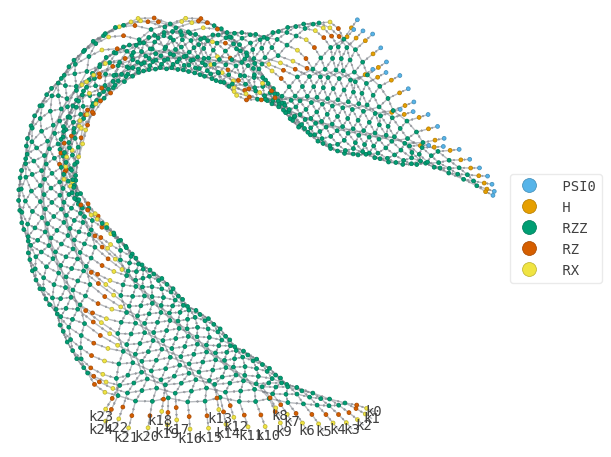

In [10]:
circ_ex.psi.draw(color=['PSI0', 'H', 'RZZ','RZ', 'RX'],show_inds=True)

In [11]:
def energy(x):
    p = len(x) // 2
    gammas = x[:p]
    betas = x[p:]
    circ = circuit_qaoa(graph,diag_terms, p, gammas, betas)

    ZZ = qu.pauli('Z') & qu.pauli('Z')
    Z = qu.pauli('Z')
    ens = [
        circ.local_expectation(weight * ZZ, edge, optimize=opt)
        for edge, weight in graph.items()
    ]
    ens_diag = [circ.local_expectation(weight * Z, cite, optimize=opt)
        for cite, weight in diag_terms.items()
    ]
    return sum(ens).real + sum(ens_diag).real + Offset

In [12]:
import tqdm



In [14]:
diag_terms.items()

dict_items([(24, -21221.5), (23, -21221.5), (22, -21221.5), (21, -21221.5), (20, -21221.5), (19, -21230.5), (18, -21230.5), (17, -21230.5), (16, -21230.5), (15, -21230.5), (14, -21248.5), (13, -21248.5), (12, -21248.5), (11, -21248.5), (10, -21248.5), (9, -21222.0), (8, -21222.0), (7, -21222.0), (6, -21222.0), (5, -21222.0), (4, -21245.5), (3, -21245.5), (2, -21245.5), (1, -21245.5), (0, -21245.5)])

In [15]:
Z = qu.pauli('Z') 

local_exp_rehs_diag = [
    circ_ex.local_expectation_rehearse(weight * Z, cite, optimize=opt)
    for cite, weight in tqdm.tqdm(list(diag_terms.items()))
]

BrokenProcessPool: A child process terminated abruptly, the process pool is not usable anymore

In [16]:
from skopt import Optimizer
from skopt.plots import plot_convergence, plot_objective

In [18]:
eps = 1e-6
bounds = (
    [(0.0        + eps, qu.pi / 2 - eps)] * p + 
    [(-qu.pi / 4 + eps, qu.pi / 4 - eps)] * p
)

bopt = Optimizer(bounds)

In [20]:
for i in tqdm.trange(50):
    x = bopt.ask()
    res = bopt.tell(x, energy(x))

  0%|          | 0/50 [00:00<?, ?it/s]


BrokenProcessPool: A child process terminated abruptly, the process pool is not usable anymore